# Planetary Science Project 1
### Sydney Petz, Aiden Zelakiewicz, Justin Anderson

In this project we explore the demographics of exoplanet populations, as well as their sensitivities and the detectability of a Earth-like planet.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import astropy.units as u
import astropy.constants as const
%matplotlib inline

In [2]:
# Creating a planet class to plot them easier
class planet():
    def __init__(self, radius, mass, orbper, sma, symbol = None):
        """Planet class for storing planet parameters.

        Parameters
        ----------
        radius : float
            radius in R_earth
        mass : float
            mass in M_earth
        orbper : float
            orbital perdiod in days
        sma : float
            semi-major axis in AU
        """
        self.radius = radius
        self.mass = mass
        self.orbper = orbper
        self.sma = sma
        self.symbol = symbol

# Creating all the planets in our solar system
earth = planet(radius = 1, mass = 1, orbper = 365, sma = 1, symbol='☉')
jupiter = planet(radius = 11.209, mass = 317.8, orbper = 4332, sma = 5.2, symbol='♃')
neptune = planet(radius = 3.883, mass = 17.147, orbper = 60190, sma = 30.1, symbol='♆')
mars = planet(radius = 0.532, mass = 0.107, orbper = 687, sma = 1.52, symbol='♂')
venus = planet(radius = 0.949, mass = 0.815, orbper = 224.7, sma = 0.723, symbol='♀')
saturn = planet(radius = 9.449, mass = 95.159, orbper = 10759, sma = 9.54, symbol='♄')
uranus = planet(radius = 4.007, mass = 14.536, orbper = 30687, sma = 19.19, symbol='⛢')
mercury = planet(radius = 0.382, mass = 0.055, orbper = 88, sma = 0.387, symbol='☿')
# pluto = planet(radius = 0.186, mass = 0.002, orbper = 90560, sma = 39.48, symbol='♇')

# Creating a dictionary of all the planets
planets = {'earth': earth, 'jupiter': jupiter, 'neptune': neptune, 'mars': mars, 'venus': venus, 'saturn': saturn, 'uranus': uranus, 'mercury': mercury}


### Now we read in the data obtained from the NASA Exoplanet Archive (NEA)

In [3]:
NEA_data = pd.read_csv('data/PS_2023.01.18_12.09.56.csv', header=100)
NEA_data.head()
# print(len(NEA_data[NEA_data['disc_facility']=='JWST']))
print(len(NEA_data[NEA_data['discoverymethod']=='Radial Velocity']))
# print(pd.unique(NEA_data['disc_facility']))

1023


# Calculating limits for various methods

### Transit

In [4]:
# Transit method
period = np.linspace(10e0, 10e6) # Array of Period values
a = np.linspace(10e-3, 10e2) # Array of Semi-major axis values

r_planet = (a * u.R_earth * (period /  1)**(1/6))

### Radial Velocity

In [5]:
#radial velocity method
sma_arr = np.linspace(10e-3,10e3) * u.AU

m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / const.G / (0.5 * u.solMass))

### Direct Imaging

In [6]:
# Using the contrast equation, solving for R_p
T_sun = 5700
T_jup = 165
Rp_imaging = np.sqrt(10**(-7) * (np.exp(14388/(10*T_jup))-1)/(np.exp(14388/(10*5700))-1))*const.R_sun
# Converting to Earth radii
Rp_imaging = Rp_imaging.to(u.R_earth)
print(Rp_imaging)

# Using angular seperation to find the semi-major axis, with standard mirror diameter of 10m and earth blackbody peak wavelength (10 um)
sma_imaging = 1.22* NEA_data['sy_dist'].min()*u.pc * 10*u.um/(10*u.m)
# Converting to AU
sma_imaging = sma_imaging.to(u.AU)
print(sma_imaging)

5.03702281902728 earthRad
0.3274354379536043 AU


### Plotting
Here we plot four figures showing different relations between mass, radius, orbital period, and semi-major axis.

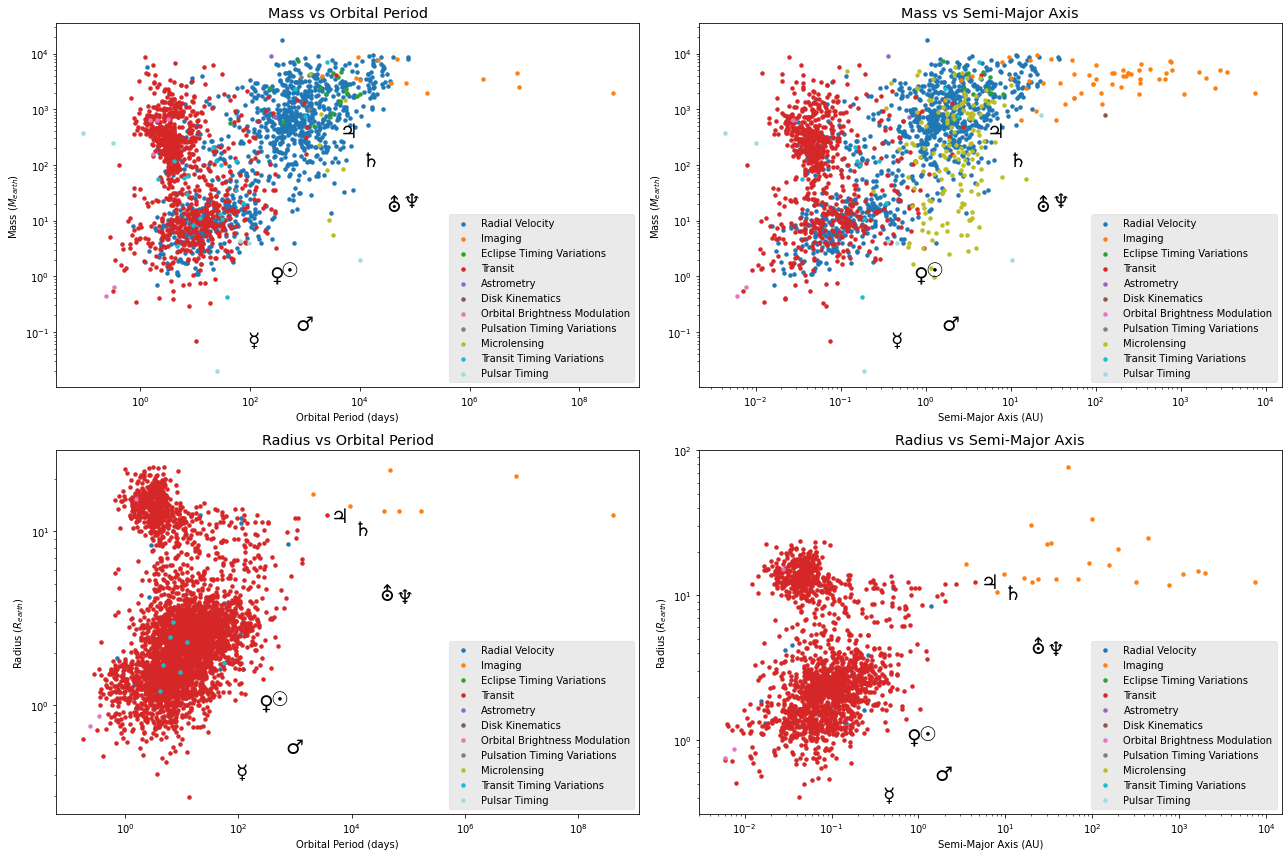

In [7]:
# Creatting the subplots
fig, axs = plt.subplots(2,2, figsize=(18,12))

# Creating a color map for the different detection methods
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(pd.unique(NEA_data['discoverymethod']))))
plt.style.use('ggplot')


# Plotting the data for each of the relationships
for i, method in enumerate(pd.unique(NEA_data['discoverymethod'])):
    axs[0][0].scatter(NEA_data[NEA_data['discoverymethod'] == method]['pl_orbper'], NEA_data[NEA_data['discoverymethod'] == method]['pl_bmasse'], label=method, color=colors[i], s=15)
    axs[1][0].scatter(NEA_data[NEA_data['discoverymethod'] == method]['pl_orbper'], NEA_data[NEA_data['discoverymethod'] == method]['pl_rade'], label=method, color=colors[i], s=15)
    axs[0][1].scatter(NEA_data[NEA_data['discoverymethod'] == method]['pl_orbsmax'], NEA_data[NEA_data['discoverymethod'] == method]['pl_bmasse'], label=method, color=colors[i], s=15)
    axs[1][1].scatter(NEA_data[NEA_data['discoverymethod'] == method]['pl_orbsmax'], NEA_data[NEA_data['discoverymethod'] == method]['pl_rade'], label=method, color=colors[i], s=15)

# Plotting all the planets in our solar system on the plots
for planet in planets:
    axs[0][0].text(planets[planet].orbper, planets[planet].mass, planets[planet].symbol, fontsize=20)
    axs[1][0].text(planets[planet].orbper, planets[planet].radius, planets[planet].symbol, fontsize=20)
    axs[0][1].text(planets[planet].sma, planets[planet].mass, planets[planet].symbol, fontsize=20)
    axs[1][1].text(planets[planet].sma, planets[planet].radius, planets[planet].symbol, fontsize=20)

# Setting the scales
for i,ax in enumerate(axs.flat):
    ax.set_yscale('log')
    ax.set_xscale('log')

# Creating the labels, titles, and legends
axs[0][0].set_xlabel('Orbital Period (days)')
axs[0][0].set_ylabel(r'Mass ($M_{earth}$)')
axs[0][0].set_title('Mass vs Orbital Period')
axs[0][0].legend()

axs[1][0].set_xlabel('Orbital Period (days)')
axs[1][0].set_ylabel(r'Radius ($R_{earth}$)')
axs[1][0].set_title('Radius vs Orbital Period')
axs[1][0].legend()

axs[0][1].set_xlabel('Semi-Major Axis (AU)')
axs[0][1].set_ylabel(r'Mass ($M_{earth}$)')
axs[0][1].set_title('Mass vs Semi-Major Axis')
axs[0][1].legend()

axs[1][1].set_xlabel('Semi-Major Axis (AU)')
axs[1][1].set_ylabel(r'Radius ($R_{earth}$)')
axs[1][1].set_title('Radius vs Semi-Major Axis')
axs[1][1].legend()

plt.tight_layout()
plt.savefig('exoplanet_demographics.pdf')

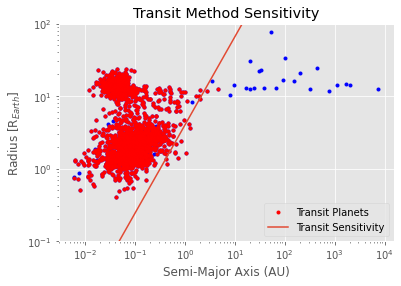

In [8]:
plt.plot(NEA_data['pl_orbsmax'], NEA_data['pl_rade'], "b.")
plt.plot(NEA_data[NEA_data['discoverymethod']=='Transit']['pl_orbsmax'], NEA_data[NEA_data['discoverymethod']=='Transit']['pl_rade'], "r.", label='Transit Planets')
plt.plot(a, r_planet, label = 'Transit Sensitivity')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel("Radius [R$_{Earth}$]")
plt.ylim(10e-2, 10e1)
plt.title('Transit Method Sensitivity')
plt.legend()
plt.savefig('Transit_Sensitivity.pdf')

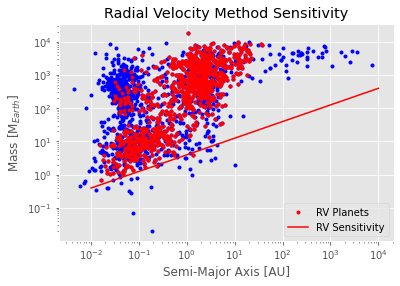

In [9]:
plt.plot(NEA_data["pl_orbsmax"], NEA_data["pl_bmasse"], "b.")
plt.plot(NEA_data[NEA_data['discoverymethod']=='Radial Velocity']['pl_orbsmax'], NEA_data[NEA_data['discoverymethod']=='Radial Velocity']['pl_bmasse'], "r.", label='RV Planets')
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="red", label="RV Sensitivity")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel("Mass [M$_{Earth}$]")
plt.title('Radial Velocity Method Sensitivity')
plt.legend()
plt.savefig('RV_Sensitivity.pdf')

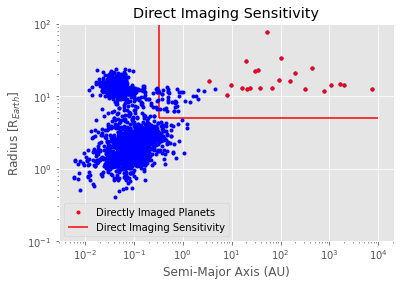

In [10]:

plt.plot(NEA_data['pl_orbsmax'], NEA_data['pl_rade'], "b.")
plt.plot(NEA_data[NEA_data['discoverymethod']=='Imaging']['pl_orbsmax'], NEA_data[NEA_data['discoverymethod']=='Imaging']['pl_rade'], "r.", label='Directly Imaged Planets')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel("Radius [R$_{Earth}$]")
plt.ylim(10e-2, 10e1)
plt.title('Direct Imaging Sensitivity')
plt.hlines(Rp_imaging.value, sma_imaging.value, 1e4, color='red')
plt.vlines(sma_imaging.value, Rp_imaging.value, 100, color='red', label='Direct Imaging Sensitivity')
plt.legend()
plt.savefig('ImagingSens.pdf')

# Detection Limits
Here we calculate the detection strength of an Earth-like planet orbiting around a Sun-like star for Transit, RV, and Direct Imaging.


### Transit

In [18]:
#Calculating the transit SNR
def SNR(delta, sigma, ntr, t_dur):
    return (delta/sigma)*np.sqrt((ntr*t_dur)/(3. * u.hour))

t_dur = 3.91 * u.hour * (365/10)**(1/3)
delta = (const.R_earth/const.R_sun)**2
ntr = 90/365
sigma = 30e-6
signal = SNR(delta, sigma, ntr, t_dur)
print(signal)

2.8926914017541336


### Radial Velocity

In [18]:
# Calculating the radial velocity amplitude
K = const.M_earth / const.M_sun * np.sqrt(const.G * const.M_sun / const.au)
print(K)

0.08945800466923792 m / s


### Direct Imaging

In [19]:
# Direct imaging contrast
contrast = ((const.R_earth/const.R_sun).value)**2 * (np.exp(14388/(10*5700))-1)/(np.exp(14388/(10*252))-1)
print(contrast)

8.025206040810404e-08
